In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [19]:
health_stats_df = pd.read_csv("data/health_stats_global.csv")
health_stats_df.sample(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
28897,Colombia,COL,Population growth (annual %),SP.POP.GROW,2.990147e+00,3.000157e+00,3.003798e+00,3.002343e+00,2.995806e+00,2.980898e+00,...,1.221874e+00,1.180647e+00,1.139578e+00,1.098885e+00,1.057898e+00,1.017449e+00,9.792658e-01,9.440042e-01,9.108802e-01,NaN
72825,Singapore,SGP,"Age population, age 09, female, interpolated",SP.POP.AG09.FE.IN,1.993700e+04,2.148000e+04,2.293100e+04,2.441700e+04,2.593200e+04,2.720900e+04,...,3.024900e+04,3.024200e+04,3.009100e+04,2.981900e+04,2.966400e+04,2.948000e+04,2.932700e+04,2.922900e+04,2.912500e+04,NaN
11383,Pre-demographic dividend,PRE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.872838e+00,NaN,NaN,NaN,NaN,NaN
51013,Kyrgyz Republic,KGZ,Ratio of school attendance of orphans to schoo...,SE.ENR.ORPH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50296,Kosovo,KSV,Pregnant women receiving prenatal care of at l...,SH.STA.ANV4.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33361,Dominica,DMA,"Population ages 50-54, female (% of female pop...",SP.POP.5054.FE.5Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87875,West Bank and Gaza,WBG,"Population ages 60-64, female (% of female pop...",SP.POP.6064.FE.5Y,NaN,NaN,NaN,NaN,NaN,NaN,...,1.522493e+00,1.528102e+00,1.537036e+00,1.549976e+00,1.560094e+00,1.577354e+00,1.598244e+00,1.618395e+00,1.636084e+00,NaN
24120,Brunei Darussalam,BRN,"School enrollment, secondary, female (% net)",SE.SEC.NENR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,8.985049e+01,8.915102e+01,9.024700e+01,9.082681e+01,9.085453e+01,9.319449e+01,9.191195e+01,8.759768e+01,NaN,NaN
12296,South Asia (IDA & IBRD),TSA,"Population ages 15-19, female (% of female pop...",SP.POP.1519.FE.5Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40647,Greenland,GRL,"Prevalence of overweight, female (% of female ...",SH.STA.OW15.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
health_stats_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
count,3.548200e+04,3.532500e+04,3.588900e+04,3.545200e+04,3.548300e+04,3.560300e+04,3.553800e+04,3.602200e+04,3.557700e+04,3.563000e+04,...,5.425500e+04,5.387800e+04,5.443700e+04,5.709900e+04,5.492200e+04,5.492700e+04,5.292400e+04,5.219900e+04,4.306800e+04,0.0
mean,4.398856e+06,4.477329e+06,4.483279e+06,4.634875e+06,4.727806e+06,4.810557e+06,4.923225e+06,4.958680e+06,5.126162e+06,5.229267e+06,...,1.066701e+08,1.178440e+08,1.194416e+08,1.202183e+08,1.354606e+08,1.381746e+08,1.470674e+08,1.534580e+08,9.105685e+06,NaN
std,4.948245e+07,5.013205e+07,5.054473e+07,5.192122e+07,5.297849e+07,5.401988e+07,5.526006e+07,5.607026e+07,5.763263e+07,5.887277e+07,...,1.017662e+10,1.077350e+10,1.114136e+10,1.132855e+10,1.212198e+10,1.255757e+10,1.312843e+10,1.388442e+10,1.112609e+08,NaN
min,-2.374024e+00,-2.498824e+00,-3.826648e+06,-3.206682e+00,-3.078607e+00,-2.978527e+00,-3.072258e+00,-4.094255e+06,-4.263603e+00,-4.645452e+00,...,-2.272986e+07,-7.720454e+00,-7.829848e+00,-9.816607e+00,-8.166639e+00,-1.578482e+07,-7.726345e+00,-7.709485e+00,-7.784170e+00,NaN
25%,1.907975e+01,2.130000e+01,1.790000e+01,2.228200e+01,2.236877e+01,2.013357e+01,2.196439e+01,1.779723e+01,2.226600e+01,2.237234e+01,...,1.360000e+01,1.351170e+01,1.377504e+01,1.326888e+01,1.410000e+01,1.257937e+01,1.393631e+01,1.387011e+01,1.490000e+01,NaN
50%,5.282000e+03,5.794000e+03,5.158000e+03,5.945000e+03,6.065000e+03,5.998000e+03,6.240000e+03,5.767000e+03,6.438000e+03,6.529500e+03,...,9.608101e+01,9.699493e+01,9.670839e+01,9.155791e+01,9.633862e+01,9.610010e+01,9.900000e+01,9.896778e+01,2.206000e+03,NaN
75%,9.993525e+04,1.034000e+05,1.025840e+05,1.078488e+05,1.107500e+05,1.125765e+05,1.156312e+05,1.151888e+05,1.211970e+05,1.243615e+05,...,8.397350e+04,8.621775e+04,8.342100e+04,6.758400e+04,8.207750e+04,8.399800e+04,9.839350e+04,1.037375e+05,1.802958e+05,NaN
max,3.035056e+09,3.076121e+09,3.129064e+09,3.193947e+09,3.259355e+09,3.326054e+09,3.395866e+09,3.465297e+09,3.535512e+09,3.609910e+09,...,2.253595e+12,2.358301e+12,2.451062e+12,2.546451e+12,2.646913e+12,2.750543e+12,2.833419e+12,2.985748e+12,7.346633e+09,NaN


In [21]:
health_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [22]:
health_stats_by_country_df = health_stats_df.set_index("Country Name")
health_stats_by_country_df = health_stats_by_country_df.drop(["Country Code", "Indicator Code"], axis=1)
health_stats_by_country_df.groupby('Indicator Name').count().sample(50)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Incidence of HIV (% of uninfected population ages 15-49),0,0,0,0,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,0
Rural poverty headcount ratio at national poverty lines (% of rural population),0,0,0,0,0,0,0,0,0,0,...,29,29,40,40,35,35,23,25,4,0
Urban population growth (annual %),211,253,253,253,253,253,253,253,253,253,...,256,256,256,256,256,255,255,255,255,0
Female population 55-59,233,233,233,233,233,233,233,233,233,233,...,235,235,235,235,235,234,234,234,234,0
"Population ages 65 and above, female",233,233,233,233,233,233,233,233,233,233,...,235,235,235,236,235,234,234,234,235,0
"Age population, age 23, male, interpolated",192,192,192,192,192,192,192,192,192,192,...,194,194,194,195,195,194,194,194,194,0
"Age population, age 24, female, interpolated",192,192,192,192,192,192,192,192,192,192,...,194,194,194,195,195,194,194,194,194,0
"Prevalence of HIV, total (% of population ages 15-49)",0,0,0,0,0,0,0,0,0,0,...,123,123,123,123,123,123,123,123,123,0
"Age population, age 08, male, interpolated",192,192,192,192,192,192,192,192,192,192,...,194,194,194,195,195,194,194,194,194,0


In [23]:
# Health expenditure, private (% of GDP)
# Health expenditure, public (% of GDP)
#Health expenditure, public (% of total health expenditure)
#Health expenditure, private (% of total health expenditure)
#Health expenditure, total (current US$)	
#Health expenditure per capita (current US$)
#Physicians (per 1,000 people)
#'Specialist surgical workforce (per 100,000 population)'
#Life expectancy at birth, total (years)
#Nurses and midwives (per 1,000 people)
#Survival to age 65, female (% of cohort)
#Survival to age 65, male (% of cohort)


##### The purpose of this EDA is to analyze the quanity vs quality argument when it comes to healthcare by looking at relationships between life expectancy, healthcare expenditure per capita, physicians (per 1,000 people), and hospital beds (per 1,000 people). The dataset has been narrowed down to three countries: The United States, Germany, and China. Each country has vastly different priorities and overall design of their healthcare systems. As well as large variations in their GDP, population, and political structures. 

In [24]:
# healthcare_quality_mask = (health_stats_df['Indicator Name'] == "Health expenditure, private (% of GDP)"
#                            ) | (health_stats_df["Indicator Name"] == "Health expenditure, public (% of GDP)"
#                                 ) | (health_stats_df['Indicator Name'] == "Health expenditure, public (% of total health expenditure)"
#                                      ) |(health_stats_df['Indicator Name'] == "Health expenditure, private (% of total health expenditure)"
#                                           ) | (health_stats_df['Indicator Name'] == "Health expenditure, total (current US$)"
#                                                ) | (health_stats_df['Indicator Name'] == "Health expenditure per capita (current US$)"
#                                                     ) | (health_stats_df['Indicator Name'] == "Physicians (per 1,000 people)"
#                                                          ) | (health_stats_df['Indicator Name'] == "Life expectancy at birth, total (years)"
#                                                                    ) | (health_stats_df['Indicator Name'] == "Nurses and midwives (per 1,000 people)"
#                                                                         ) | (health_stats_df['Indicator Name'] == "Survival to age 65, female (% of cohort)"
#                                                                              ) | (health_stats_df['Indicator Name'] == "Survival to age 65, male (% of cohort)")




# global_healthcare_quality_df = health_stats_df[healthcare_quality_mask]
# global_healthcare_quality_df['Country Name'].unique()

# country_mask = (global_healthcare_quality_df['Country Name'] == 'United States') | (global_healthcare_quality_df['Country Name'] == 'Germany') | (global_healthcare_quality_df['Country Name'] == 'China')

# us_de_ch_healthcare_quality_df = global_healthcare_quality_df[country_mask]
# us_de_ch_healthcare_quality_df = us_de_ch_healthcare_quality_df.drop(["Country Code", "Indicator Code", "Unnamed: 60"], axis=1)
# us_de_ch_healthcare_quality_df = us_de_ch_healthcare_quality_df.reset_index()
# us_de_ch_healthcare_quality_df = us_de_ch_healthcare_quality_df.drop("index", axis=1)






# narrowed_us_de_ch_healthcare_df = us_de_ch_healthcare_quality_df.drop(us_de_ch_healthcare_quality_df.iloc[:, 2:37], axis=1)

# narrowed_us_de_ch_healthcare_df = narrowed_us_de_ch_healthcare_df.set_index(['Country Name', 'Indicator Name'])



# narrowed_us_de_ch_healthcare_df.head()

In [25]:
# healthcare_quality_mask = (health_stats_df["Indicator Name"] == "Health expenditure, total (% of GDP)"
#                                 ) | (health_stats_df['Indicator Name'] == "Health expenditure per capita (current US$)"
#                                                     ) | (health_stats_df['Indicator Name'] == "Physicians (per 1,000 people)"
#                                                          ) | (health_stats_df['Indicator Name'] == "Life expectancy at birth, total (years)"
#                                                                    ) | (health_stats_df['Indicator Name'] == "Survival to age 65, female (% of cohort)"
#                                                                              ) | (health_stats_df['Indicator Name'] == "Survival to age 65, male (% of cohort)")

healthcare_quality_mask = (health_stats_df['Indicator Name'] == "Health expenditure per capita (current US$)"
                                                    ) | (health_stats_df['Indicator Name'] == "Physicians (per 1,000 people)"
                                                         ) | (health_stats_df['Indicator Name'] == "Life expectancy at birth, total (years)"
                                                                   ) | (heath_stats_df['Indicator Name'] == 'Hospital beds (per 1,000 people)')


global_healthcare_quality_df = health_stats_df[healthcare_quality_mask]
#global_healthcare_quality_df['Country Name'].unique()

us_mask = (global_healthcare_quality_df['Country Name'] == 'United States')
ger_mask = (global_healthcare_quality_df['Country Name'] == 'Germany')
ch_mask = (global_healthcare_quality_df['Country Name'] == 'China')

us_healthcare_quality_df = global_healthcare_quality_df[us_mask]
us_healthcare_quality_df = us_healthcare_quality_df.drop(["Country Code", "Indicator Code", "Unnamed: 60"], axis=1)
us_healthcare_quality_df = us_healthcare_quality_df.reset_index()
us_healthcare_quality_df = us_healthcare_quality_df.drop("index", axis=1)

de_healthcare_quality_df = global_healthcare_quality_df[ger_mask]
de_healthcare_quality_df = de_healthcare_quality_df.drop(["Country Code", "Indicator Code", "Unnamed: 60"], axis=1)
de_healthcare_quality_df = de_healthcare_quality_df.reset_index()
de_healthcare_quality_df = de_healthcare_quality_df.drop("index", axis=1)

ch_healthcare_quality_df = global_healthcare_quality_df[ch_mask]
ch_healthcare_quality_df = ch_healthcare_quality_df.drop(["Country Code", "Indicator Code", "Unnamed: 60"], axis=1)
ch_healthcare_quality_df = ch_healthcare_quality_df.reset_index()
ch_healthcare_quality_df = ch_healthcare_quality_df.drop("index", axis=1)






narrowed_us_healthcare_df = us_healthcare_quality_df.drop(us_healthcare_quality_df.iloc[:, 2:37], axis=1)
narrowed_us_healthcare_df = narrowed_us_healthcare_df.set_index('Indicator Name')
narrowed_us_healthcare_df = narrowed_us_healthcare_df.drop('Country Name', axis=1)


narrowed_de_healthcare_df = de_healthcare_quality_df.drop(de_healthcare_quality_df.iloc[:, 2:37], axis=1)
narrowed_de_healthcare_df = narrowed_de_healthcare_df.set_index('Indicator Name')
narrowed_de_healthcare_df = narrowed_de_healthcare_df.drop('Country Name', axis=1)


narrowed_ch_healthcare_df = ch_healthcare_quality_df.drop(ch_healthcare_quality_df.iloc[:, 2:37], axis=1)
narrowed_ch_healthcare_df = narrowed_ch_healthcare_df.set_index('Indicator Name')
narrowed_ch_healthcare_df = narrowed_ch_healthcare_df.drop('Country Name', axis=1)



narrowed_ch_healthcare_df


NameError: name 'heath_stats_df' is not defined

<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

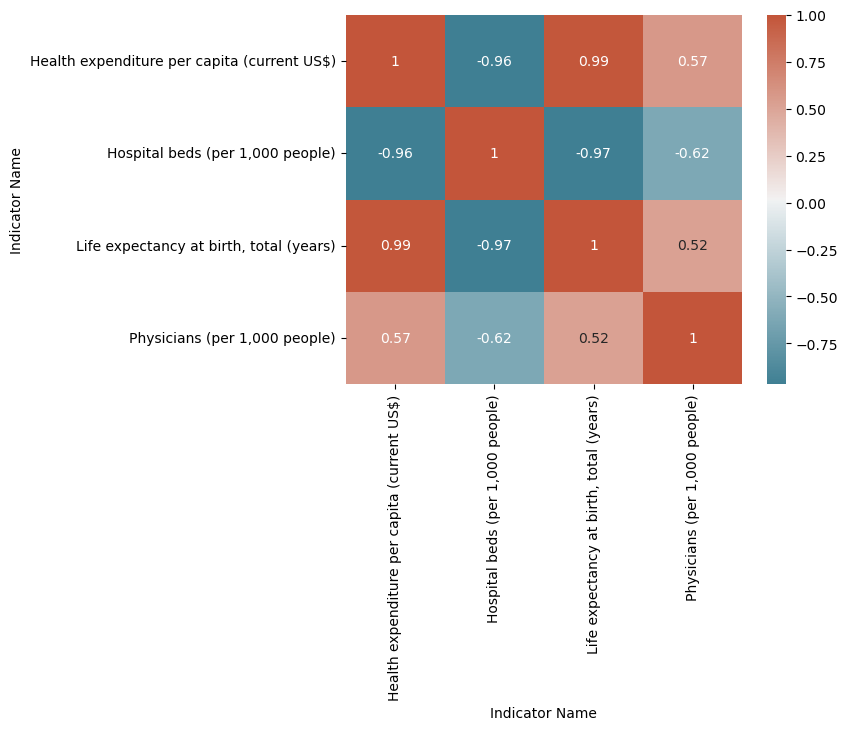

In [ ]:
# ax = narrowed_us_de_ch_healthcare_df.unstack(level=0).plot(kind='line', subplots=True, rot=0)
# plt.tight_layout()

# narrowed_us_de_ch_healthcare_df.iloc[(1,)].plot()
# fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(narrowed_us_healthcare_df.T.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))



<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

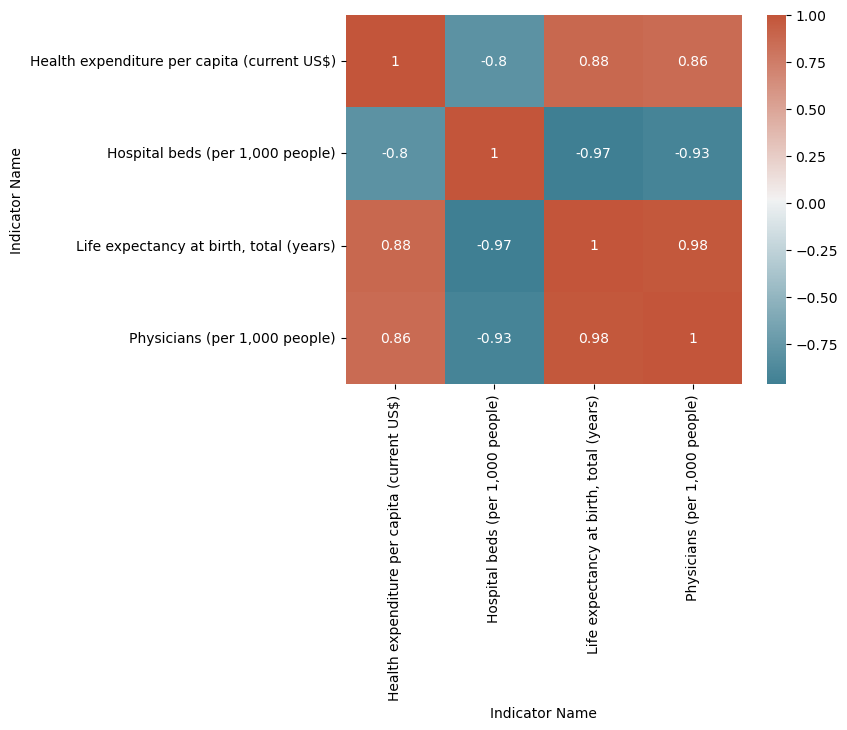

In [ ]:
sns.heatmap(narrowed_de_healthcare_df.T.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

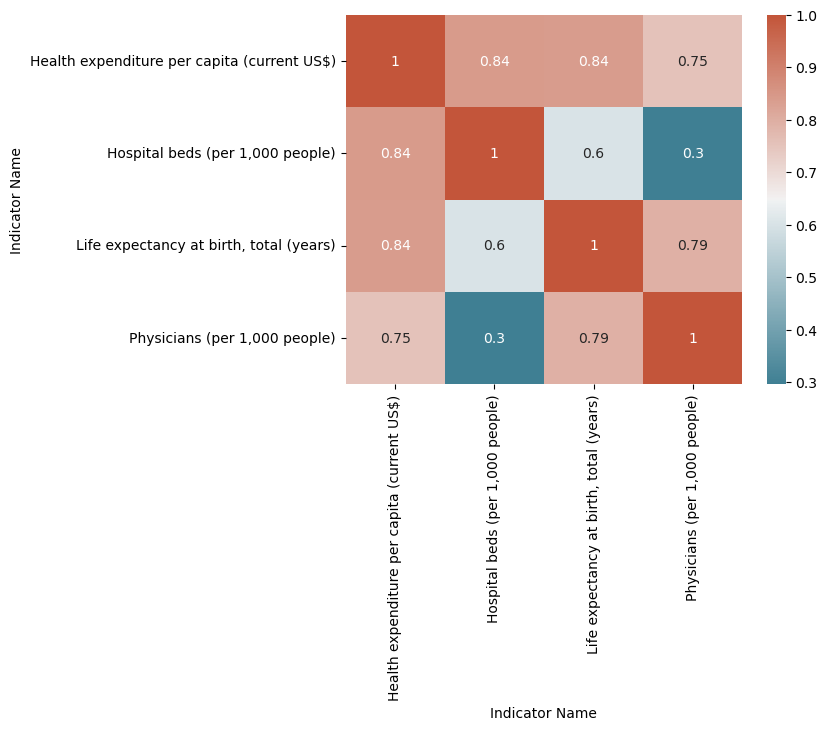

In [ ]:
sns.heatmap(narrowed_ch_healthcare_df.T.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: >

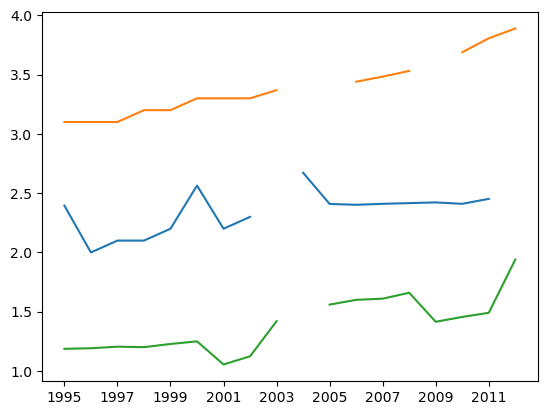

In [ ]:
# narrowed_us_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T.plot()
# narrowed_de_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T.plot()
# narrowed_ch_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T.plot()

narrowed_us_healthcare_df.loc["Physicians (per 1,000 people)"].T.plot()
narrowed_de_healthcare_df.loc["Physicians (per 1,000 people)"].T.plot()
narrowed_ch_healthcare_df.loc["Physicians (per 1,000 people)"].T.plot()

# narrowed_us_healthcare_df.loc["Health expenditure per capita (current US$)"].T.plot()
# narrowed_de_healthcare_df.loc["Health expenditure per capita (current US$)"].T.plot()
# narrowed_ch_healthcare_df.loc["Health expenditure per capita (current US$)"].T.plot()

<Axes: >

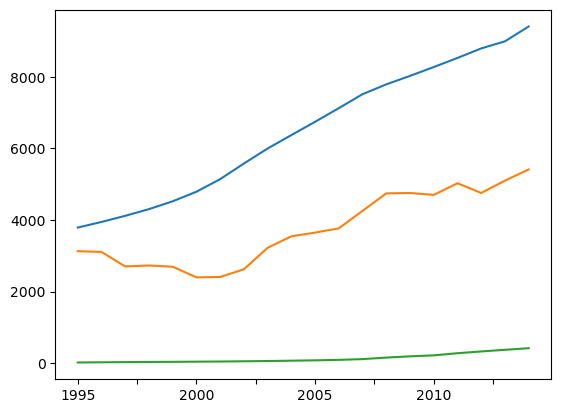

In [ ]:
narrowed_us_healthcare_df.loc["Health expenditure per capita (current US$)"].T.plot()
narrowed_de_healthcare_df.loc["Health expenditure per capita (current US$)"].T.plot()
narrowed_ch_healthcare_df.loc["Health expenditure per capita (current US$)"].T.plot()



Text(0.5, 1.0, 'Physicians vs Hospital Beds')

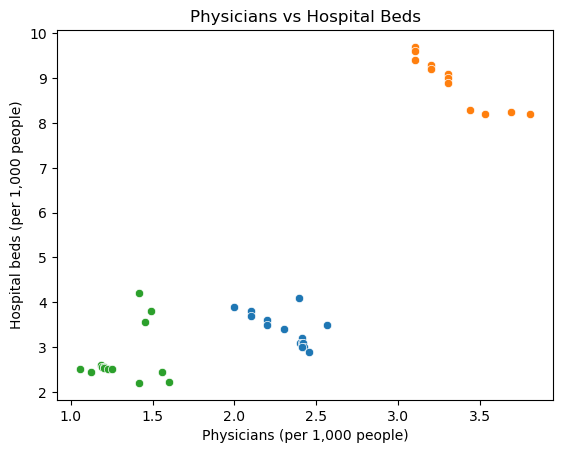

In [ ]:
# narrowed_us_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T.plot.scatter(x="Physicians (per 1,000 people)", y="Hospital beds (per 1,000 people)")
# narrowed_de_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T.plot.scatter(x="Physicians (per 1,000 people)", y="Hospital beds (per 1,000 people)")
# narrowed_ch_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T.plot.scatter(x="Physicians (per 1,000 people)", y="Hospital beds (per 1,000 people)")

sns.scatterplot(x="Physicians (per 1,000 people)", y="Hospital beds (per 1,000 people)",data=narrowed_us_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T)
sns.scatterplot(x="Physicians (per 1,000 people)", y="Hospital beds (per 1,000 people)",data=narrowed_de_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T)
sns.scatterplot(x="Physicians (per 1,000 people)", y="Hospital beds (per 1,000 people)",data=narrowed_ch_healthcare_df.loc[["Hospital beds (per 1,000 people)", "Physicians (per 1,000 people)"]].T)
plt.title("Physicians vs Hospital Beds")

In [ ]:
sns.scatterplot(x="Physicians (per 1,000 people)", y="Health expenditure per capita (current US$)",data=narrowed_us_healthcare_df.loc[["Health expenditure per capita (current US$)", "Physicians (per 1,000 people)"]].T)
sns.scatterplot(x="Physicians (per 1,000 people)", y="Health expenditure per capita (current US$)",data=narrowed_de_healthcare_df.loc[["Health expenditure per capita (current US$)", "Physicians (per 1,000 people)"]].T)
sns.scatterplot(x="Physicians (per 1,000 people)", y="Health expenditure per capita (current US$)",data=narrowed_ch_healthcare_df.loc[["Health expenditure per capita (current US$)", "Physicians (per 1,000 people)"]].T)

NameError: name 'sns' is not defined

KeyError: 'Health expenditure per capita (current US$)'

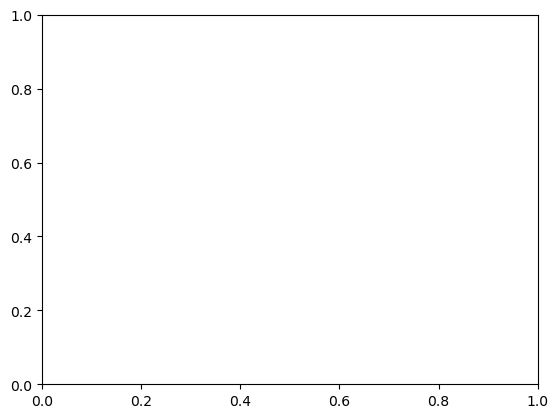

In [ ]:
fig, ax = plt.subplots()

ax.plot(narrowed_us_healthcare_df.index, narrowed_us_healthcare_df['Health expenditure per capita (current US$)'])

In [ ]:
#narrowed_us_de_ch_healthcare_df.T.plot()
# t_narrowed = narrowed_us_de_ch_healthcare_df.T

# t_narrowed
# fig, ax = plt.subplots()

# ax.plot(t_narrowed[['Germany', 'Physicians (per 1,000 people)']])

In [ ]:
health_stats_df['Indicator Name'].unique()

array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age popula

# Possible Questions to Explore

## Question List:

### Questions about the US?
### Literacy rate, adult male (% of males ages 15 and above)
### Literacy rate, adult female (% of female ages 15 and above)
### Health expenditure, total (% of GDP)
### Population growth (annual %)
### Rural population (% of total population)
### Labor force, female (% of total labor force)	
### Labor force, male (% of total labor force)

### Physicians per 1,000 people vs total healthcare expentatures 